# Clustering on discrete attributes and cluster characterization

**Author:** *Xavier Jacome Piñeiros*

**Methodology References:**
*   Clustering on discrete attributes: Rakotomalala (2017)
*   Group Characterization: Lebart et al. (2000)

**Data source:**
*   Congressional Voting Records: UC Irvine Machine Learning Repository
    * Data source has label Class.

**Objective:**
*   Apply clustering technique to group votes. Then, compare Cluster label to Class label and measure precision of the clustering methodology.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('CongressVote.xls')
df.head()

,handicapped-infants,water-project-cost-sharin,adoption-of-the-budget-re,physician-fee-freeze,el-salvador-aid,religious-groups-in-schoo,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutb,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act,Class
0,n,y,n,y,y,y,n,n,n,y,_??,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,_??,republican
2,_??,y,y,_??,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,_??,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,_??,y,y,y,y,democrat


In [3]:
df.shape

(435, 17)

## Multiple correspondence analysis

In [4]:
try:
  import prince
except:
  !pip install prince
  import prince

**Features for applying MCA, drop Class label**

In [5]:
features_mca = df.columns[:-1].tolist()
features_mca

['handicapped-infants',
 'water-project-cost-sharin',
 'adoption-of-the-budget-re',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schoo',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutb',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act']

**Number of components to accumulate 50% of variance, n_components = 5**

In [6]:
mca = prince.MCA(
    n_components=5,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df[features_mca])

**Eigenvalues and % of variance (cumulative)**

In [7]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.472,23.61%,23.61%
1,0.269,13.47%,37.08%
2,0.096,4.81%,41.89%
3,0.090,4.49%,46.39%
4,0.075,3.77%,50.16%


**Components coordinates**

In [8]:
mca_df = mca.row_coordinates(df[features_mca])
mca_df.head()

,0,1,2,3,4
0,0.885081,0.173614,0.037213,0.066712,-0.193959
1,0.874057,-0.051963,-0.159879,0.129511,0.328996
2,0.489310,0.721367,0.614691,1.200622,0.163289
3,0.146652,0.181170,-0.214416,0.767353,-0.445385
4,0.235387,0.055041,-0.405664,0.492033,-0.109831


## Clustering (KMeans) on MCA coordinates

In [9]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from tqdm import *
import matplotlib.pyplot as plt

**The elbow method and the Calinski-Harabasz method are applied to determine the optimal number of clusters.**

<ipython-input-10-b23295138f23>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(2, 11)): # Entre 2 y 10 clusters / 2 to 10 clusters evaluated


  0%|          | 0/9 [00:00<?, ?it/s]

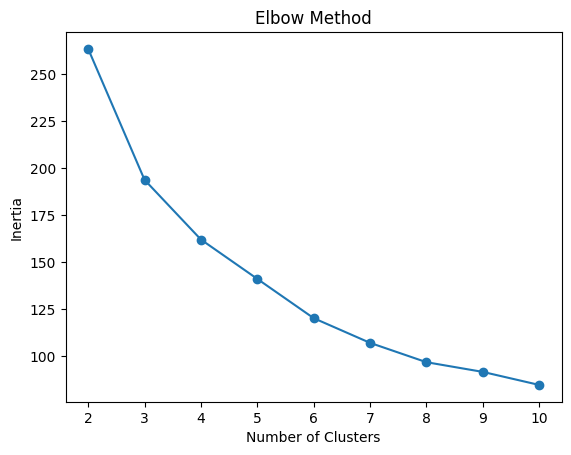

In [10]:
# (1) Elbow Method
inertia_expl = []
for k in tqdm_notebook(range(2, 11)): # Entre 2 y 10 clusters / 2 to 10 clusters evaluated
    kmeans = KMeans(n_clusters=k, n_init=5).fit(mca_df)
    # Calcular la inercia explicada / inertia explained
    inertia_expl.append(kmeans.inertia_)


plt.plot(range(2, 11), inertia_expl, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

<ipython-input-11-1fbe1121db78>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(2, 11)): # Between 2 and 10 Clusters


  0%|          | 0/9 [00:00<?, ?it/s]

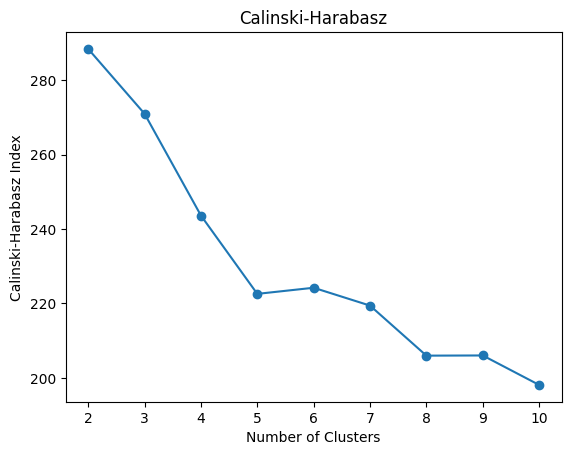

In [11]:
# (2) Calinski-Harabasz Index
ch_scores = []
for k in tqdm_notebook(range(2, 11)): # Between 2 and 10 Clusters
    kmeans = KMeans(n_clusters=k, n_init=5).fit(mca_df)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(mca_df, labels)
    ch_scores.append(ch_score)


plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz')
plt.show()

**The methods suggest 2 clusters. This is consistent with the original data label, Class, which in this example is used later to validate pseudo accuracy.**

In [12]:
kmeans = KMeans(
    n_clusters=2,
    max_iter=10,
    n_init=5,
    random_state=42
)
kmeans = kmeans.fit(mca_df)


In [13]:
df['Cluster'] = kmeans.labels_

## Metrics of the clusters

In [14]:
#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

#printing the instance names and their cluster number
print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))

      0
0   361
0   358
0   157
0   263
0   159
..  ...
1   211
1   214
1   215
1   223
1   434

[435 rows x 1 columns]


In [15]:
#overall mean for each variable
m = mca_df.mean()

In [16]:
#TSS (total sum of squares)
TSS = mca_df.shape[0]*mca_df.var(ddof=0)
print(TSS)

0    205.414543
1    117.195164
2     42.027630
3     39.178627
4     32.876075
dtype: float64


In [17]:
#slicing the data.frame according to the groups
gb = mca_df.groupby(kmeans.labels_)

In [18]:
#conditional groups size
nk = gb.size()
print(nk)

0    239
1    196
dtype: int64


In [19]:
#conditional means
mk = gb.mean()
print(mk)

          0         1         2         3         4
0 -0.573548  0.006977  0.003424  0.005236 -0.010309
1  0.699378 -0.008508 -0.004175 -0.006385  0.012571


In [20]:
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2

#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)

#sum => BSS (between sum of squares)
BSS = np.sum(EM,axis=0)
print(BSS)

0    174.490272
1      0.025820
2      0.006220
3      0.014542
4      0.056374
dtype: float64


In [21]:
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

0    0.849454
1    0.000220
2    0.000148
3    0.000371
4    0.001715
dtype: float64


## Group Characterization - Test Value

In [22]:
import pandas as pd
import numpy as np

# Defining the functions as provided by the user

def test_value_continuous(group_mean, overall_mean, empirical_variance, n_total, n_group):
    numerator = group_mean - overall_mean
    denominator = np.sqrt(((n_total-n_group)/(n_total-1))*(empirical_variance/n_group))
    test_value = numerator / denominator
    return test_value

def test_value_categorical(n_ij, n_j, n_group, n_total):
    expected = (n_group * n_j) / n_total
    numerator = n_ij - expected
    denominator = np.sqrt(((n_total - n_group)/(n_total-1))  * (1 - (n_j / n_total)) * ((n_group * n_j) / n_total))
    test_value = numerator / denominator
    return test_value

# Creating a function that calculates the test values for a given dataframe

def calculate_test_values(df, inputs, target):
    results = []
    n_total = len(df)
    groups = df[target].unique()

    for group in groups:
        df_group = df[df[target] == group]
        n_group = len(df_group)

        for input in inputs:
            if pd.api.types.is_numeric_dtype(df[input]):
                # Continous variable
                type = 'continuos'
                group_mean = df_group[input].mean()
                overall_mean = df[input].mean()
                empirical_variance = df[input].var(ddof=1)  # ddof=1 to get the sample variance
                group_empirical_variance = df_group[input].var(ddof=1)
                test_value = test_value_continuous(group_mean, overall_mean, empirical_variance, n_total, n_group)
                recall_accuracy = None  # Placeholder, as calculation is not defined
            else:
                # Categorical variable
                value_counts = df[input].value_counts()
                group_value_counts = df_group[input].value_counts()

                for category in value_counts.index:
                    type = 'categorical'
                    n_ij = group_value_counts.get(category, 0)

                    n_j = value_counts[category]

                    test_value = test_value_categorical(n_ij, n_j, n_group, n_total)

                    group_accuracy = n_ij / n_group if n_group != 0 else 0
                    recall = n_ij / n_j if n_j != 0 else 0
                    frecuency = n_j / n_total if n_total != 0 else 0
                    results.append({
                        'Type' : type,
                        'Attribute': input,
                        'Category': category,
                        'Group': group,
                        'Test Value': test_value,
                        'Recall': recall,
                        'Group Accuracy': group_accuracy,
                        'Overall Accuracy': frecuency,
                        'Group Count': n_ij,
                        'Total Count': n_j
                    })
                continue

            results.append({
                'Type' : type,
                'Attribute': input,
                'Group': group,
                'Test Value': test_value,
                'Recall Accuracy': recall_accuracy,
                'Group Mean': group_mean,
                'Overall Mean': overall_mean,
                'Group Standard Deviation':np.sqrt(group_empirical_variance),
                'Overall Standard Deviation': np.sqrt(empirical_variance)
            })

    results_df = pd.DataFrame(results)

    if results_df['Type'].nunique()==2:
        results_df = results_df[['Group','Type', 'Attribute', 'Category', 'Test Value'
                                 , 'Group Mean', 'Overall Mean', 'Group Standard Deviation', 'Overall Standard Deviation'
                                 ,'Recall', 'Group Accuracy', 'Overall Accuracy']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False, False, True])

    elif results_df['Type'].unique()=='continuos':
        results_df = results_df[['Group','Type', 'Attribute','Test Value'
                                 ,'Group Mean', 'Overall Mean', 'Group Standard Deviation', 'Overall Standard Deviation']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False,False,True])

    else:
        results_df = results_df[['Group','Type', 'Attribute', 'Category','Test Value'
                                 ,'Recall', 'Group Accuracy', 'Overall Accuracy']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False, False, True])


    return results_df

In [23]:
df.head()

,handicapped-infants,water-project-cost-sharin,adoption-of-the-budget-re,physician-fee-freeze,el-salvador-aid,religious-groups-in-schoo,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutb,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act,Class,Cluster
0,n,y,n,y,y,y,n,n,n,y,_??,y,y,y,n,y,republican,1
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,_??,republican,1
2,_??,y,y,_??,y,y,n,n,n,n,y,n,y,y,n,n,democrat,1
3,n,y,y,n,_??,y,n,n,n,n,y,n,y,n,n,y,democrat,1
4,y,y,y,n,y,y,n,n,n,n,y,_??,y,y,y,y,democrat,1


In [24]:
df['Class'].value_counts()

democrat      267
republican    168
Name: Class, dtype: int64

In [25]:
inputs = df.columns[:-1]
target = 'Cluster'

# Calculate the test values
test_value = calculate_test_values(df, inputs, target)

In [26]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

for i in test_value['Group'].unique():
    print('\n')
    print('Cluster '+str(i))
    display(test_value[(test_value['Group']==i)&(test_value['Test Value'].abs()>=2)])



Cluster 1


,Group,Type,Attribute,Category,Test Value,Recall,Group Accuracy,Overall Accuracy
12,1,categorical,el-salvador-aid,y,18.0010,0.8915,0.9643,0.4874
22,1,categorical,aid-to-nicaraguan-contras,n,17.1875,0.9438,0.8571,0.4092
10,1,categorical,physician-fee-freeze,y,16.8990,0.9379,0.8469,0.4069
25,1,categorical,mx-missile,n,16.0355,0.8544,0.8980,0.4736
7,1,categorical,adoption-of-the-budget-re,n,15.7556,0.9181,0.8010,0.3931
49,1,categorical,Class,republican,15.6779,0.9226,0.7908,0.3862
34,1,categorical,education-spending,y,14.5732,0.8830,0.7704,0.3931
19,1,categorical,anti-satellite-test-ban,n,14.4383,0.8571,0.7959,0.4184
39,1,categorical,crime,y,14.4378,0.7500,0.9490,0.5701
36,1,categorical,superfund-right-to-sue,y,14.0310,0.7990,0.8520,0.4805




Cluster 0


,Group,Type,Attribute,Category,Test Value,Recall,Group Accuracy,Overall Accuracy
63,0,categorical,el-salvador-aid,n,17.6736,0.9904,0.8619,0.4782
71,0,categorical,aid-to-nicaraguan-contras,y,17.6380,0.9256,0.9372,0.5563
59,0,categorical,physician-fee-freeze,n,16.3782,0.8907,0.9205,0.5678
98,0,categorical,Class,democrat,15.6779,0.8464,0.9456,0.6138
56,0,categorical,adoption-of-the-budget-re,y,15.4139,0.8617,0.9121,0.5816
74,0,categorical,mx-missile,y,14.6995,0.9179,0.7950,0.4759
90,0,categorical,crime,n,14.3213,0.9765,0.6946,0.3908
68,0,categorical,anti-satellite-test-ban,y,14.2552,0.8577,0.8577,0.5494
83,0,categorical,education-spending,n,14.0858,0.8627,0.8410,0.5356
87,0,categorical,superfund-right-to-sue,n,13.8167,0.9055,0.7615,0.4621


## Evaluate relation between Class label and Cluster label

It could be named as "accuracy" of the clustering when contrasting the cluster results with the real label.

In [27]:
import math
from scipy.stats import chi2_contingency

# Cross Tabulation
table = pd.crosstab(df['Class'], df['Cluster'])

table_styled = table.style.set_table_attributes("style='display:inline'").set_caption('Tabulación Cruzada')

# Calculating Chi-Squared and Other Statistics
chi2, p, dof, expected = chi2_contingency(table)

# Phi2
phi2 = chi2 / df.shape[0]

# Cramer's V
cramers_v = math.sqrt(phi2 / min(table.shape[0] - 1, table.shape[1] - 1))

# Tschuprow's T
tschuprows_t = math.sqrt((phi2 / (table.shape[0] - 1) / (table.shape[1] - 1)))

# Results
print("Tabulación Cruzada:\n")
display(table_styled)
print("\nChi2: {:.2f}".format(chi2))
print("Pr(Chi2): {:.2f}".format(p))
print("Phi2: {:.2f}".format(phi2))
print("Cramer's V: {:.2f}".format(cramers_v))
print("Tschuprow's T: {:.2f}".format(tschuprows_t))

# Interpretation of Chi-Squared
if p < 0.05:
    print("\nThere is a significant association between 'Class' and 'Cluster'.")
else:
    print("\nThere is no significant association between 'Class' and 'Cluster'.")

# Additional Interpretations
print("\nAdditional Interpretations:")
print(f"Phi2 ({phi2:.2f}): A higher value indicates a stronger association. In this case, the value suggests {'a strong' if phi2 > 0.1 else 'a weak'} association.")
print(f"Cramer's V ({cramers_v:.2f}): It varies between 0 and 1. A value close to 1 indicates a strong association, while a value near 0 indicates a weak association.")
print(f"Tschuprow's T ({tschuprows_t:.2f}): Similar to Cramer's V, but adjusted for tables larger than 2x2. A higher value indicates a greater association.")

Tabulación Cruzada:



Cluster,0,1
Class,,
democrat,226,41
republican,13,155



Chi2: 243.27
Pr(Chi2): 0.00
Phi2: 0.56
Cramer's V: 0.75
Tschuprow's T: 0.75

There is a significant association between 'Class' and 'Cluster'.

Additional Interpretations:
Phi2 (0.56): A higher value indicates a stronger association. In this case, the value suggests a strong association.
Cramer's V (0.75): It varies between 0 and 1. A value close to 1 indicates a strong association, while a value near 0 indicates a weak association.
Tschuprow's T (0.75): Similar to Cramer's V, but adjusted for tables larger than 2x2. A higher value indicates a greater association.


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
print(confusion_matrix(df['Class'], df['Cluster'].replace({1:'democrat',0:'republican'})))

# Create a classification report
print(classification_report(df['Class'], df['Cluster'].replace({1:'democrat',0:'republican'})))

# Calculate accuracy score
print('Accuracy: ', accuracy_score(df['Class'], df['Cluster'].replace({1:'democrat',0:'republican'})))

[[ 41 226]
 [155  13]]
              precision    recall  f1-score   support

    democrat       0.21      0.15      0.18       267
  republican       0.05      0.08      0.06       168

    accuracy                           0.12       435
   macro avg       0.13      0.12      0.12       435
weighted avg       0.15      0.12      0.13       435

Accuracy:  0.12413793103448276


In [29]:
print('Accuracy: ', accuracy_score(df['Class'], df['Cluster'].replace({0:'democrat',1:'republican'})))

Accuracy:  0.8758620689655172
